# Generate Data

A lot of times data is not readily available. But if we understand the anticipated schema of the data, we can generate them to complete the process before touching the real deal.

In [217]:
from mimesis import Generic, locales
from mimesis.enums import Algorithm

g = Generic(locales.EN_CA)

# generate a pool of device IDs
device_ids = []
for _ in range(50_000):
    device_ids.append(g.cryptographic.hash(Algorithm.SHA1))

device_ids[:10]

['e6f4a37d3b74eb358762a967f6bf71bb9ea7fe0a',
 '132719c4f6aa2f144c91cda1015121c2228039f7',
 '55950663e0a4378d97038891b89c77984ffebd15',
 '8017068752c97a9e5880b19e5f191031dc9ed8c8',
 'b5467e541a4e50c7043d94b06cb1f19dc01c078d',
 '3eeb67e963df3fe30c212e0385a2fc1ea675ce30',
 'c8cf8a29f45793cc163608bd4d6381389690921b',
 'b913c5597a9fb77017f6a68d68ddb3a06b8b0c81',
 'fe6e113caf98346771b4a85e3e085dc9dd852561',
 'a7bfb48f4fb2f315f3534b680345b18b6228203e']

In [306]:
brands = [g.business.company() for _ in range(13)]
pois = []

for b in brands:
    for _ in range(random.randint(14, 715)):
        pois.append({
            'name': b,
            'address': g.address.address(),
            'city': g.address.city(),
            'region': g.address.region(abbr=True).split('-')[-1],
            'country': 'CA',
        })

pois = pd.DataFrame(pois)
pois

,name,address,city,region,country
0,Cameco,532 Stinson Street,Pinellas Park,SK,CA
1,Cameco,1382 Twin Lakes Drive,Idaho Falls,NT,CA
2,Cameco,175 Gopher Avenue,Eastlake,MB,CA
3,Cameco,1327 Mitchell Drive,Newberg,NT,CA
4,Cameco,858 Roxborough Drive,Gretna,PE,CA
...,...,...,...,...,...
5003,BigPark,684 Otterburn Alley,Glendale Heights,NU,CA
5004,BigPark,110 Raffeallo Avenue,Cartersville,NU,CA
5005,BigPark,260 Lotta St,Kinston,NS,CA
5006,BigPark,971 Lazard St,Xenia,PE,CA


In [307]:
%%time
# build fake audience with randomly assigned device IDs per 
audiences = []

for row in pois.itertuples():
    # generate hourly date range for a week
    for dt in pd.date_range(start='2021-05-01', end='2021-05-31', freq='H'):
        if dt.strftime('%A') in ['Saturday', 'Sunday']:
            continue
        
        if dt.strftime('%-H') not in [str(i) for i in range(9, 22)]:
            continue

        _ids = random.sample(device_ids, random.randint(1, 5))
        audiences.append({
            'total_counts': len(_ids),
            'device_ids': _ids,
            'hour': dt.strftime('%H'),
            'day': dt.strftime('%A'),
            'date': dt.strftime('%Y%m%d'),
            'name': row.name,
            'address': row.address,
            'city': row.city,
            'region': row.region,
            'country': row.country,
        })

CPU times: user 1min 8s, sys: 1.1 s, total: 1min 9s
Wall time: 1min 9s


In [308]:
df = pd.DataFrame(audiences)
df

,total_counts,device_ids,hour,day,date,name,address,city,region,country
0,1,[349d0a33163e1f18b95596a5c2b4202967adb70f],09,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
1,4,"[4360ce37396e126338327077f2b2584de288aae5, 268...",10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
2,1,[1fe924210f968edfd9ad66c66807e7266bef0635],11,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
3,5,"[04d3524c21f66f52173ceae8250fce69d2c01936, e30...",12,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
4,4,"[f4ef48f5746a49bc18b80d7717eb9265813dd637, 730...",13,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
...,...,...,...,...,...,...,...,...,...,...
1302075,1,[f445e1a9e62e3c0953e8c4c32a2f3de31ba67bd5],17,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
1302076,3,"[9c2e39e5e51d1cd36b324a9891f581d29f22fe8c, 86b...",18,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
1302077,5,"[4284487ad4fcd5f6e30cf2ec44140d1178e3a947, 1db...",19,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
1302078,5,"[323918b2898706099c10c2a20d60cb11a56c5532, 4ae...",20,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA


In [309]:
df.total_counts.describe()  # a probable indicator of generated data

count    1.302080e+06
mean     2.999267e+00
std      1.414391e+00
min      1.000000e+00
25%      2.000000e+00
50%      3.000000e+00
75%      4.000000e+00
max      5.000000e+00
Name: total_counts, dtype: float64

In [310]:
exp = df.explode('device_ids').drop('total_counts', axis=1).reset_index(drop=True)
exp

,device_ids,hour,day,date,name,address,city,region,country
0,349d0a33163e1f18b95596a5c2b4202967adb70f,09,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
1,4360ce37396e126338327077f2b2584de288aae5,10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
2,2680b95eaa773c3f2b432aba2448c78c2df3eb23,10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
3,668433bff48807651fd270935717b4d798c0e6b6,10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
4,52ecd783b9868ce20917d2d7cbcc82c80dffc462,10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
...,...,...,...,...,...,...,...,...,...
3905281,194685d28fe7bd06d0b57715e984e8e230633fc2,20,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
3905282,2bd9ece4215777fcede4f89a391b926df4a6001c,20,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
3905283,3345fc731806f39b875a041dc47594e7b98d62fc,20,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
3905284,afbd528011b4ed2f6d83b61f271295d2fd0e16c9,21,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA


In [311]:
dedupe = exp.drop_duplicates(subset=['device_ids', 'day', 'hour', 'date'], keep='last')  # get rid of ppl with TARDIS
dedupe

,device_ids,hour,day,date,name,address,city,region,country
1,4360ce37396e126338327077f2b2584de288aae5,10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
2,2680b95eaa773c3f2b432aba2448c78c2df3eb23,10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
3,668433bff48807651fd270935717b4d798c0e6b6,10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
4,52ecd783b9868ce20917d2d7cbcc82c80dffc462,10,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
5,1fe924210f968edfd9ad66c66807e7266bef0635,11,Monday,20210503,Cameco,532 Stinson Street,Pinellas Park,SK,CA
...,...,...,...,...,...,...,...,...,...
3905281,194685d28fe7bd06d0b57715e984e8e230633fc2,20,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
3905282,2bd9ece4215777fcede4f89a391b926df4a6001c,20,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
3905283,3345fc731806f39b875a041dc47594e7b98d62fc,20,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA
3905284,afbd528011b4ed2f6d83b61f271295d2fd0e16c9,21,Friday,20210528,BigPark,642 Badgeley Av,Rockville,QC,CA


In [312]:
from pandas.api.types import CategoricalDtype

wkds = CategoricalDtype(categories=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'], ordered=True)
dedupe = dedupe.copy()
dedupe['day'] = dedupe['day'].astype(wkds)
gb = dedupe.groupby(['name', 'day', 'hour'], as_index=False).agg({'device_ids': 'count'})
gb

,name,day,hour,device_ids
0,Addition Elle,Monday,09,2783
1,Addition Elle,Monday,10,2682
2,Addition Elle,Monday,11,2760
3,Addition Elle,Monday,12,2851
4,Addition Elle,Monday,13,2683
...,...,...,...,...
840,IDA,Friday,17,5569
841,IDA,Friday,18,5459
842,IDA,Friday,19,5477
843,IDA,Friday,20,5704


In [313]:
pv = gb[gb['name'] == 'IDA'].pivot('day', 'hour', 'device_ids')
pv

hour,09,10,11,12,13,14,15,16,17,18,19,20,21
day,,,,,,,,,,,,,
Monday,5565,5582,5616,5559,5738,5490,5614,5635,5575,5518,5587,5607,5579
Tuesday,5577,5570,5572,5466,5500,5660,5688,5703,5567,5620,5592,5576,5528
Wednesday,5503,5585,5508,5570,5583,5696,5626,5613,5575,5533,5528,5476,5600
Thursday,5680,5566,5593,5616,5663,5446,5604,5561,5607,5620,5592,5613,5542
Friday,5518,5609,5570,5634,5655,5511,5523,5534,5569,5459,5477,5704,5517


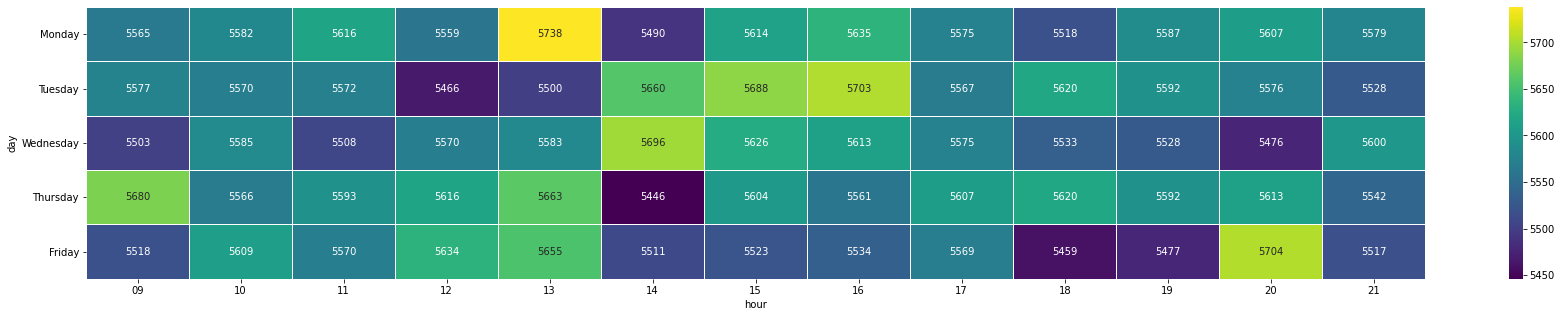

In [314]:
import matplotlib.pyplot as plot
import seaborn as sns

_, ax = plot.subplots(figsize=(30, 5))
heatmap = sns.heatmap(pv, annot=True, fmt='.0f', cmap='viridis', linecolor='white', linewidths='0.5', ax=ax)

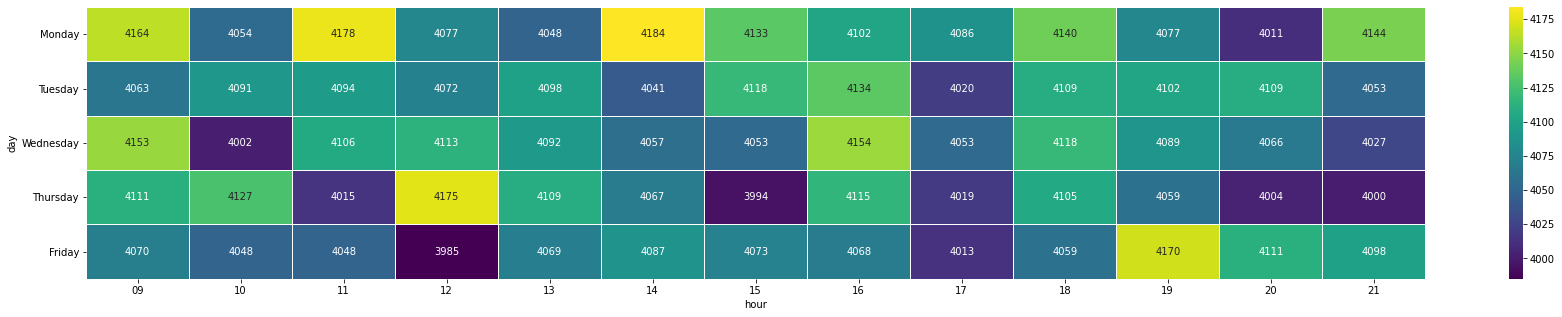

In [315]:
import matplotlib.pyplot as plot
import seaborn as sns

def heatmap(df, col, col_val):
    gb = df.groupby([col, 'day', 'hour'], as_index=False).agg({'device_ids': 'count'})
    gb = gb[(gb.device_ids < gb.device_ids.quantile(0.95))]
    pv = gb[gb[col] == col_val].pivot('day', 'hour', 'device_ids')
    _, ax = plot.subplots(figsize=(30, 5))
    heatmap = sns.heatmap(pv, annot=True, fmt='.0f', cmap='viridis', linecolor='white', linewidths='0.5', ax=ax)


heatmap(dedupe, 'region', 'ON')